In [ ]:
import pandas as pd
rd = pd.read_csv("/content/Walmart_Sales.csv")
print(rd.head(5))
rd.info()

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [ ]:
rd['Date'] = pd.to_datetime(rd['Date'],format='%d-%m-%Y')
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
rd.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
sales_by_date = rd.groupby('Date')['Weekly_Sales'].sum().reset_index()
print(sales_by_date.head())

        Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30


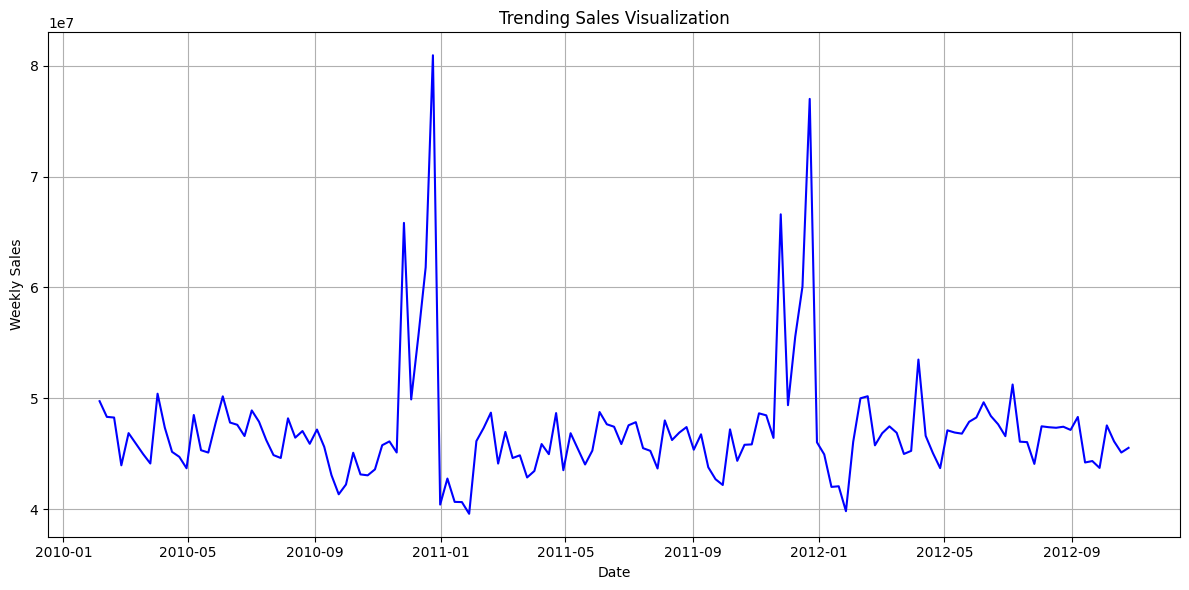

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(sales_by_date['Date'],sales_by_date['Weekly_Sales'],color='blue')
plt.title('Trending Sales Visualization')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
store_sales = rd.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values(by='Weekly_Sales',ascending=False)
store_sales.head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [ ]:
top_score = 301397800
second_score = 299544000
diff_percentage = (top_score - second_score) / second_score *100
print(f"Store 20 has {diff_percentage:.2f}% more sales than Store 4")

Store 20 has 0.62% more sales than Store 4


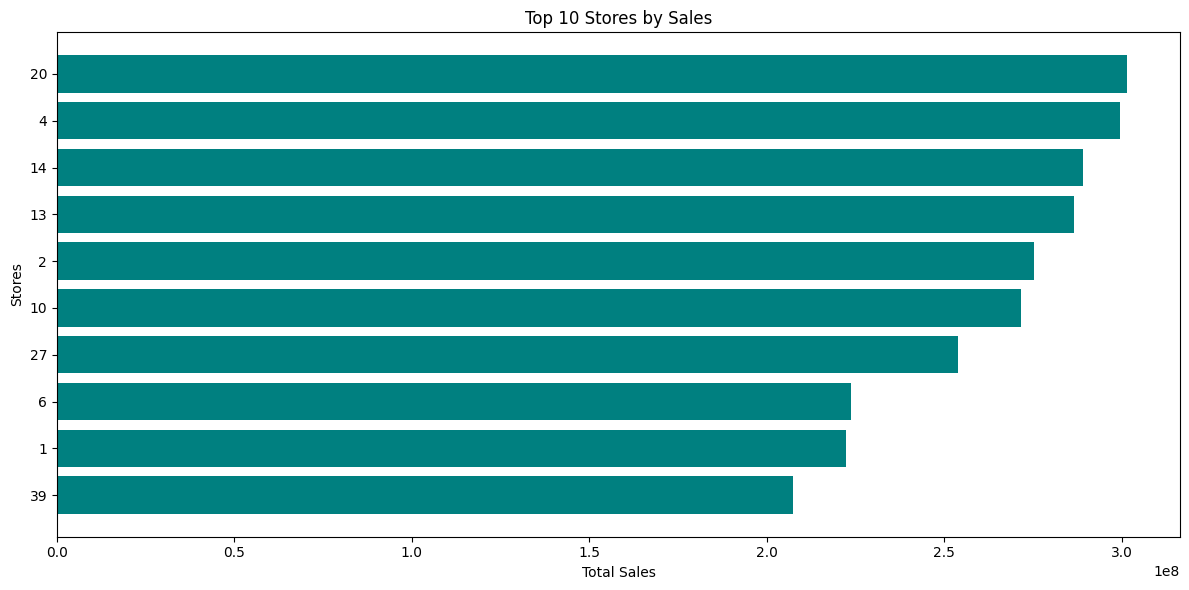

In [ ]:
top_stores = store_sales.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_stores['Store'].astype(str),top_stores['Weekly_Sales'],color='teal')
plt.xlabel("Total Sales")
plt.ylabel("Stores")
plt.title("Top 10 Stores by Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
holiday_sales = rd[rd['Holiday_Flag']==1]['Weekly_Sales'].mean()
non_holiday_sales = rd[rd['Holiday_Flag']==0]['Weekly_Sales'].mean()
print(f"Holiday Sales: {holiday_sales:.2f}")
print(f"Non-Holiday Sales: {non_holiday_sales:.2f}")


Holiday Sales: 1122887.89
Non-Holiday Sales: 1041256.38


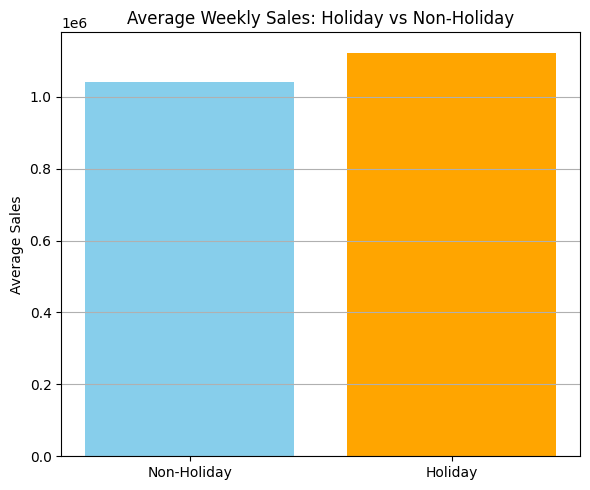

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(['Non-Holiday', 'Holiday'], [non_holiday_sales, holiday_sales], color=['skyblue', 'orange'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
correlation = rd.corr(numeric_only=True)['Weekly_Sales'].sort_values(ascending=False)
print(correlation)

Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


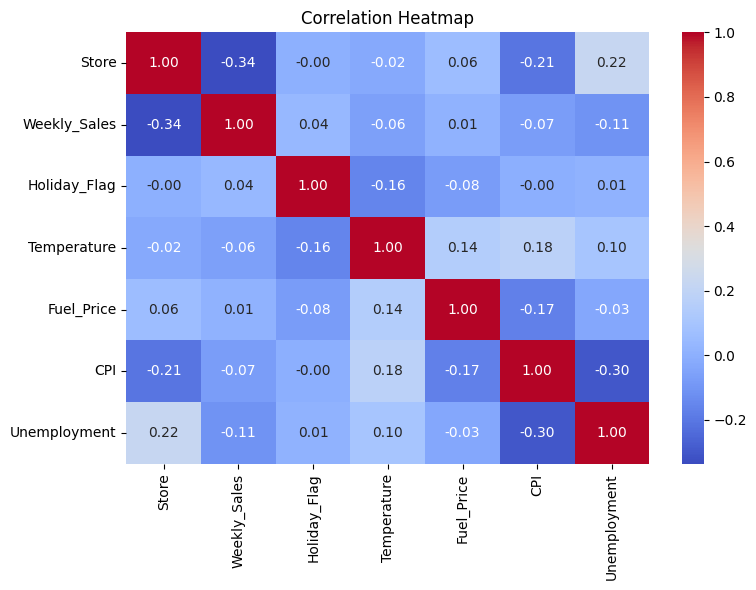

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(rd.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

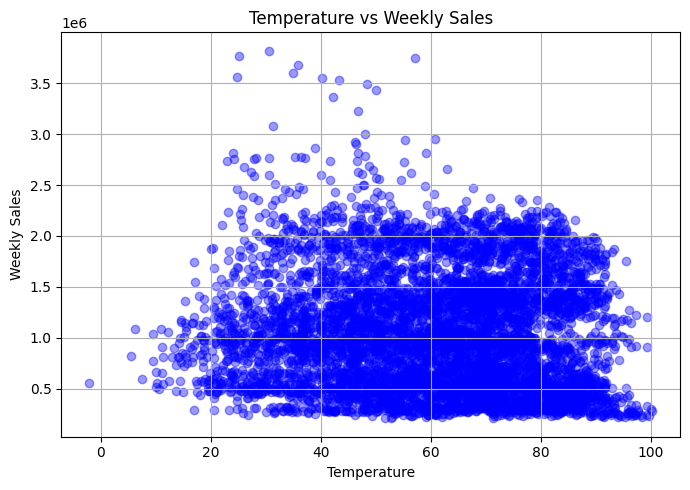

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(rd['Temperature'], rd['Weekly_Sales'], alpha=0.4, color='blue')
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


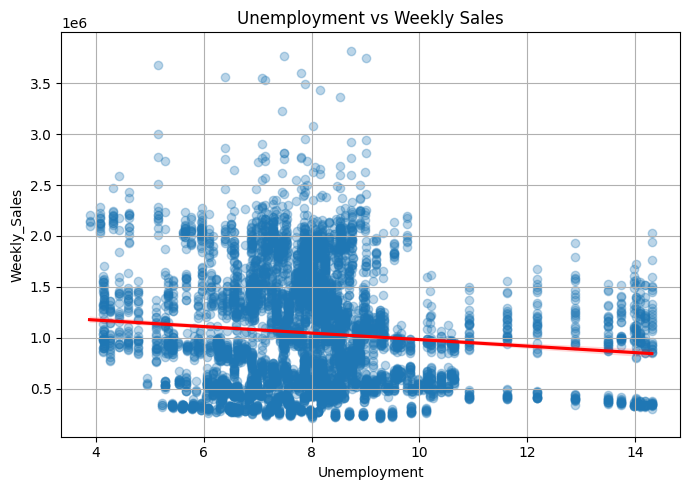

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(data=rd, x='Unemployment', y='Weekly_Sales', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Unemployment vs Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


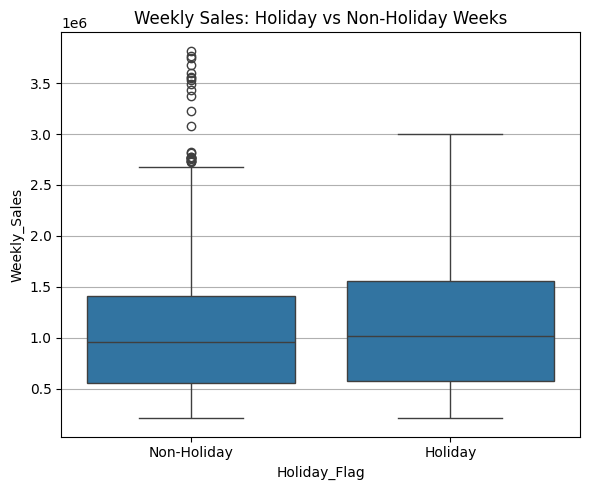

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=rd, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
rd.to_csv("cleaned_walmart_sales.csv", index=False)
